In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_json('./schoolInfo.json')

In [4]:
df.head()

,acceptance-rate,act-avg,aliasNames,businessRepScore,city,cost-after-aid,displayName,engineeringRepScore,enrollment,hs-gpa-avg,...,rankingType,region,sat-avg,schoolType,sortName,state,tuition,urlName,xwalkId,zip
0,7.0,32.0,None,NaN,Princeton,16793.0,Princeton University,4.1,5400.0,3.9,...,national-universities,NaN,1400.0,national-universities,princetonuniversity,NJ,47140,princeton-university,186131,8544
1,5.0,32.0,None,NaN,Cambridge,16338.0,Harvard University,3.6,6710.0,4.0,...,national-universities,NaN,1430.0,national-universities,harvarduniversity,MA,48949,harvard-university,166027,2138
2,8.0,32.0,UChicago,NaN,Chicago,27767.0,University of Chicago,NaN,5941.0,4.0,...,national-universities,NaN,1450.0,national-universities,universityofchicago,IL,54825,university-of-chicago,144050,60637
3,6.0,32.0,None,NaN,New Haven,18385.0,Yale University,3.4,5472.0,NaN,...,national-universities,NaN,1420.0,national-universities,yaleuniversity,CT,51400,yale-university,130794,6520
4,6.0,32.0,None,NaN,New York,21041.0,Columbia University,3.8,6113.0,NaN,...,national-universities,NaN,1430.0,national-universities,columbiauniversity,NY,57208,columbia-university,190150,10027


In [5]:
df.shape

(311, 39)

In [6]:
df.drop(columns=['aliasNames','nonResponder','nonResponderText',
                 'primaryKey','primaryPhoto','primaryPhotoThumb',
                 'ranking','rankingDisplayName','rankingDisplayScore',
                 'rankingIsTied','rankingMaxPossibleScore','rankingNoteCharacter',
                 'rankingRankStatus','rankingSortRank','rankingType',
                 'rankingNoteText','region','xwalkId','zip'],
        inplace=True)

In [7]:
df.columns

Index(['acceptance-rate', 'act-avg', 'businessRepScore', 'city',
       'cost-after-aid', 'displayName', 'engineeringRepScore', 'enrollment',
       'hs-gpa-avg', 'institutionalControl', 'isPublic', 'overallRank',
       'percent-receiving-aid', 'rankingDisplayRank', 'sat-avg', 'schoolType',
       'sortName', 'state', 'tuition', 'urlName'],
      dtype='object')

In [8]:
df.shape

(311, 20)

In [9]:
df.isnull().sum()

acceptance-rate            9
act-avg                   20
businessRepScore          77
city                       0
cost-after-aid           168
displayName                0
engineeringRepScore      105
enrollment                11
hs-gpa-avg                67
institutionalControl       0
isPublic                   0
overallRank                0
percent-receiving-aid    168
rankingDisplayRank         0
sat-avg                   20
schoolType                 0
sortName                   0
state                      0
tuition                    0
urlName                    0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acceptance-rate,302.0,60.390728,22.546806,5.0,47.25,65.0,76.00,100.0
act-avg,291.0,23.024055,4.159257,15.0,20.00,22.0,26.00,34.0
businessRepScore,234.0,2.832479,0.590240,2.0,2.40,2.7,3.20,4.8
cost-after-aid,143.0,33920.867133,7625.493383,13186.0,28613.00,34621.0,38936.00,51810.0
engineeringRepScore,206.0,2.803398,0.645916,2.0,2.30,2.6,3.10,4.9
enrollment,300.0,14895.256667,10660.572830,133.0,6428.00,12104.5,21661.75,55776.0
hs-gpa-avg,244.0,3.543443,0.252066,2.8,3.40,3.5,3.70,4.0
overallRank,311.0,83.623794,75.788351,-2.0,-1.00,75.0,151.00,223.0
percent-receiving-aid,143.0,35.279720,17.163426,5.0,21.00,35.0,47.00,81.0
sat-avg,291.0,1044.027491,157.701571,715.0,930.00,1010.0,1130.00,1510.0


In [11]:
name_list = [each for each in df['displayName']]

In [12]:
df2 = pd.read_csv('uni_outcomes.csv')

In [13]:
df2.drop(columns="Unnamed: 0", inplace=True)

In [14]:
df2.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'AGEGE24', 'PCT_WHITE',
       'PCT_BLACK', 'PCT_ASIAN', 'PCT_HISPANIC', 'PCT_BA', 'PCT_GRAD_PROF',
       'PCT_BORN_US', 'MEDIAN_HH_INC', 'POVERTY_RATE', 'UNEMP_RATE',
       'LN_MEDIAN_HH_INC', 'COUNT_NWNE_P10', 'COUNT_WNE_P10',
       'MN_EARN_WNE_P10', 'MD_EARN_WNE_P10', 'PCT10_EARN_WNE_P10',
       'PCT25_EARN_WNE_P10', 'PCT75_EARN_WNE_P10', 'PCT90_EARN_WNE_P10',
       'SD_EARN_WNE_P10', 'COUNT_WNE_INC1_P10', 'COUNT_WNE_INC2_P10',
       'COUNT_WNE_INC3_P10', 'COUNT_WNE_INDEP0_INC1_P10',
       'COUNT_WNE_INDEP0_P10', 'COUNT_WNE_INDEP1_P10', 'COUNT_WNE_MALE0_P10',
       'COUNT_WNE_MALE1_P10', 'GT_25K_P10', 'MN_EARN_WNE_INC1_P10',
       'MN_EARN_WNE_INC2_P10', 'MN_EARN_WNE_INC3_P10',
       'MN_EARN_WNE_INDEP0_INC1_P10', 'MN_EARN_WNE_INDEP0_P10',
       'MN_EARN_WNE_INDEP1_P10', 'MN_EARN_WNE_MALE0_P10',
       'MN_EARN_WNE_MALE1_P10', 'COUNT_NWNE_P6', 'COUNT_WNE_P6',
       'MN_EARN_WNE_P6', 'MD_EARN_WNE_P6', 'PCT10_EARN_WNE_P6',
   

In [15]:
df2 = df2[['INSTNM','PCT_WHITE','PCT_ASIAN','PCT_BLACK',
     'PCT_HISPANIC','PCT_BA','PCT_GRAD_PROF','PCT_BORN_US',
     'MEDIAN_HH_INC','POVERTY_RATE','UNEMP_RATE',
     'LN_MEDIAN_HH_INC','MN_EARN_WNE_P10']]

In [16]:
final_unis = [each for each in df2['INSTNM']]

In [17]:
index_list = []
for each in final_unis:
    if (df['displayName'] == each).sum() == 1:
        index_list.append(df[df['displayName'] == each].index.values[0])
    else:
        pass

In [18]:
df = df.ix[index_list]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [19]:
df = df.merge(df2, on=df2['INSTNM'])

In [20]:
df.drop(columns=['businessRepScore','cost-after-aid','engineeringRepScore','percent-receiving-aid'], inplace=True)

In [21]:
df.isnull().sum()

key_0                    0
acceptance-rate          1
act-avg                  3
city                     0
displayName              0
enrollment               1
hs-gpa-avg              20
institutionalControl     0
isPublic                 0
overallRank              0
rankingDisplayRank       0
sat-avg                  7
schoolType               0
sortName                 0
state                    0
tuition                  0
urlName                  0
INSTNM                   0
PCT_WHITE                0
PCT_ASIAN                0
PCT_BLACK                0
PCT_HISPANIC             0
PCT_BA                   0
PCT_GRAD_PROF            0
PCT_BORN_US              0
MEDIAN_HH_INC            0
POVERTY_RATE             0
UNEMP_RATE               0
LN_MEDIAN_HH_INC         0
MN_EARN_WNE_P10          0
dtype: int64

In [22]:
df['acceptance-rate'].fillna(df['acceptance-rate'].mean(), inplace=True)
df['act-avg'].fillna(df['act-avg'].mean(), inplace=True)
df['enrollment'].fillna(df['enrollment'].mean(), inplace=True)
df['hs-gpa-avg'].fillna(df['hs-gpa-avg'].mean(), inplace=True)
df['sat-avg'].fillna(df['sat-avg'].mean(), inplace=True)

In [23]:
df.isnull().sum()

key_0                   0
acceptance-rate         0
act-avg                 0
city                    0
displayName             0
enrollment              0
hs-gpa-avg              0
institutionalControl    0
isPublic                0
overallRank             0
rankingDisplayRank      0
sat-avg                 0
schoolType              0
sortName                0
state                   0
tuition                 0
urlName                 0
INSTNM                  0
PCT_WHITE               0
PCT_ASIAN               0
PCT_BLACK               0
PCT_HISPANIC            0
PCT_BA                  0
PCT_GRAD_PROF           0
PCT_BORN_US             0
MEDIAN_HH_INC           0
POVERTY_RATE            0
UNEMP_RATE              0
LN_MEDIAN_HH_INC        0
MN_EARN_WNE_P10         0
dtype: int64

In [24]:
df.dtypes

key_0                    object
acceptance-rate         float64
act-avg                 float64
city                     object
displayName              object
enrollment              float64
hs-gpa-avg              float64
institutionalControl     object
isPublic                   bool
overallRank               int64
rankingDisplayRank       object
sat-avg                 float64
schoolType               object
sortName                 object
state                    object
tuition                   int64
urlName                  object
INSTNM                   object
PCT_WHITE               float64
PCT_ASIAN               float64
PCT_BLACK               float64
PCT_HISPANIC            float64
PCT_BA                  float64
PCT_GRAD_PROF           float64
PCT_BORN_US             float64
MEDIAN_HH_INC           float64
POVERTY_RATE            float64
UNEMP_RATE              float64
LN_MEDIAN_HH_INC        float64
MN_EARN_WNE_P10         float64
dtype: object

In [25]:
df['isPublic'] = df['isPublic'].map({True: 1, False: 0}).astype(int)

In [26]:
df.dtypes

key_0                    object
acceptance-rate         float64
act-avg                 float64
city                     object
displayName              object
enrollment              float64
hs-gpa-avg              float64
institutionalControl     object
isPublic                  int64
overallRank               int64
rankingDisplayRank       object
sat-avg                 float64
schoolType               object
sortName                 object
state                    object
tuition                   int64
urlName                  object
INSTNM                   object
PCT_WHITE               float64
PCT_ASIAN               float64
PCT_BLACK               float64
PCT_HISPANIC            float64
PCT_BA                  float64
PCT_GRAD_PROF           float64
PCT_BORN_US             float64
MEDIAN_HH_INC           float64
POVERTY_RATE            float64
UNEMP_RATE              float64
LN_MEDIAN_HH_INC        float64
MN_EARN_WNE_P10         float64
dtype: object

In [27]:
df.drop(columns=['key_0','schoolType'], inplace=True)

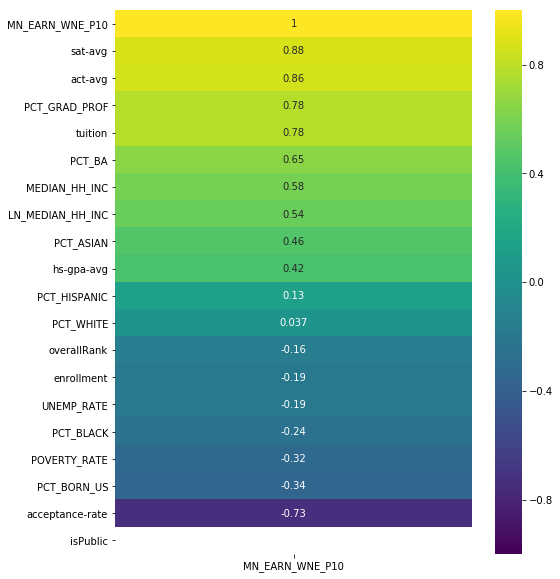

In [28]:
plt.figure(figsize=(8,10))
sns.heatmap(df.corr()[['MN_EARN_WNE_P10']].sort_values(by='MN_EARN_WNE_P10', ascending=False),
            cmap='viridis', annot=True, vmin=-1, vmax=1)

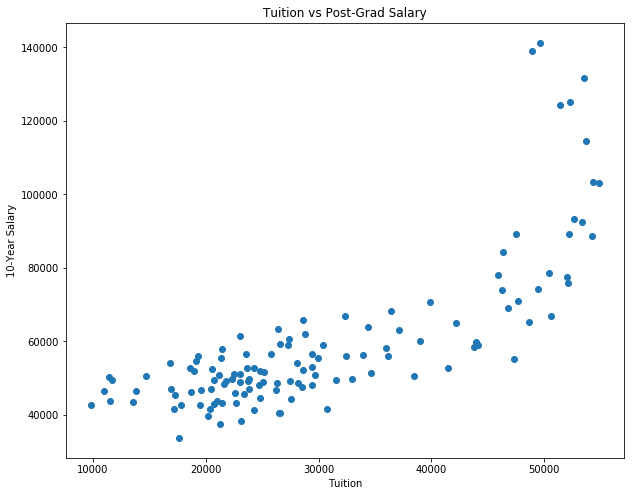

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(df['tuition'],df['MN_EARN_WNE_P10'])
plt.xlabel('Tuition')
plt.ylabel('10-Year Salary')
plt.title('Tuition vs Post-Grad Salary');

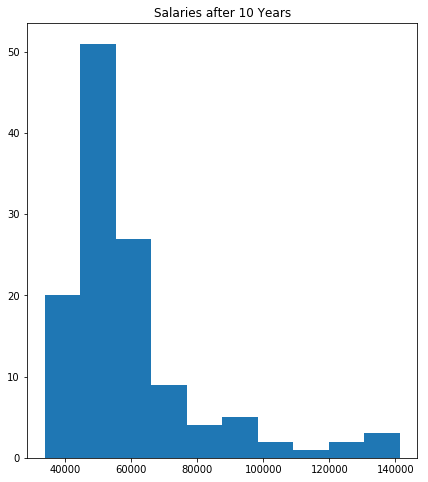

In [30]:
plt.figure(figsize=(7,8))
plt.hist(df['MN_EARN_WNE_P10'])
plt.title('Salaries after 10 Years');

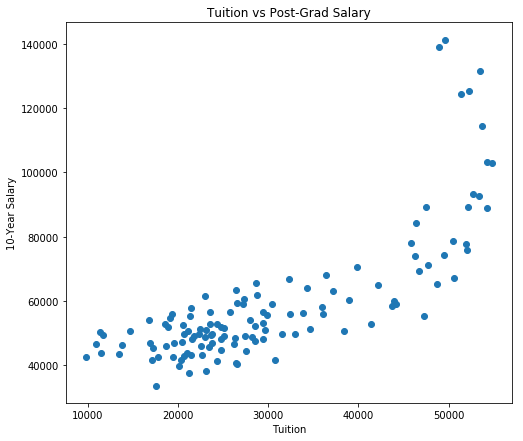

In [31]:
plt.figure(figsize=(8,7))
plt.scatter(df['tuition'],df['MN_EARN_WNE_P10'])
plt.xlabel('Tuition')
plt.ylabel('10-Year Salary')
plt.title('Tuition vs Post-Grad Salary');

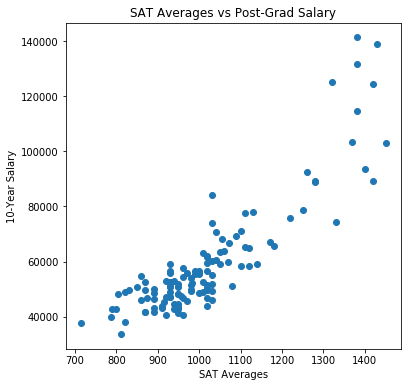

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(df['sat-avg'],df['MN_EARN_WNE_P10'])
plt.xlabel('SAT Averages')
plt.ylabel('10-Year Salary')
plt.title('SAT Averages vs Post-Grad Salary');

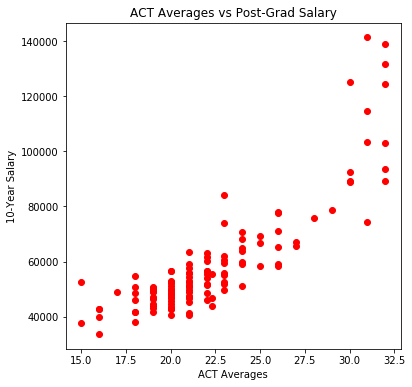

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(df['act-avg'],df['MN_EARN_WNE_P10'], color='red')
plt.xlabel('ACT Averages')
plt.ylabel('10-Year Salary')
plt.title('ACT Averages vs Post-Grad Salary');

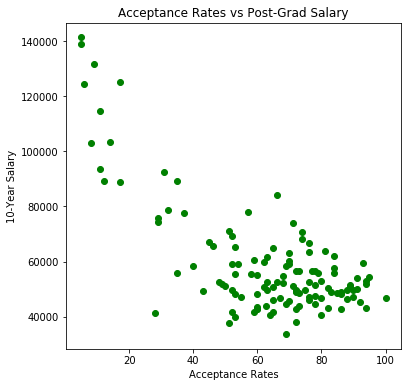

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(df['acceptance-rate'],df['MN_EARN_WNE_P10'], color='green')
plt.xlabel('Acceptance Rates')
plt.ylabel('10-Year Salary')
plt.title('Acceptance Rates vs Post-Grad Salary');

In [35]:
df.loc[84,'overallRank']

-1

In [36]:
for each in list(range(84,124)):
    df.loc[each,'overallRank'] = each + 150

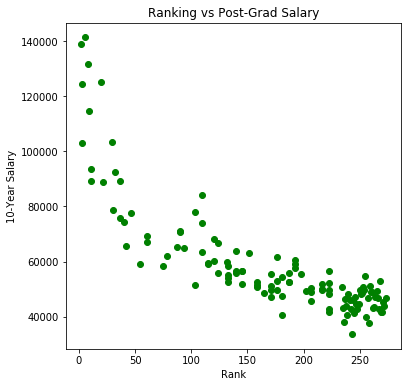

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(df['overallRank'],df['MN_EARN_WNE_P10'], color='green')
plt.xlabel('Rank')
plt.ylabel('10-Year Salary')
plt.title('Ranking vs Post-Grad Salary');

In [38]:
high_sat = df[df['sat-avg'] > 1200]
high_sat[high_sat['MN_EARN_WNE_P10'] > 100000][['displayName','acceptance-rate','tuition','MN_EARN_WNE_P10']]

,displayName,acceptance-rate,tuition,MN_EARN_WNE_P10
0,Harvard University,5.0,48949,139100.0
1,University of Chicago,8.0,54825,103000.0
2,Yale University,6.0,51400,124400.0
3,Stanford University,5.0,49617,141300.0
4,University of Pennsylvania,9.0,53534,131600.0
5,Duke University,11.0,53744,114500.0
8,Georgetown University,17.0,52300,125200.0
10,Tufts University,14.0,54318,103300.0


In [39]:
X = df[['acceptance-rate','act-avg','enrollment','hs-gpa-avg','isPublic',
        'overallRank','sat-avg','tuition','PCT_WHITE',
        'PCT_ASIAN','PCT_BLACK','PCT_HISPANIC','PCT_BA','PCT_GRAD_PROF','PCT_BORN_US',
        'MEDIAN_HH_INC','POVERTY_RATE','UNEMP_RATE','LN_MEDIAN_HH_INC']]
y = df['MN_EARN_WNE_P10']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [41]:
lr = LinearRegression()

lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train), lr.score(X_test_sc, y_test)

(0.861500196196263, 0.7838709086435813)

In [42]:
lr.coef_

array([-4.47457233e+02,  1.06541225e+03, -1.67164850e+03, -3.42438678e+03,
        3.09228199e-11,  2.63278543e+01,  1.51108046e+04,  1.68690205e+03,
       -2.69099188e+03,  5.89228694e+03,  8.60328028e+02,  5.90231818e+03,
       -4.94465072e+03,  4.90661499e+03,  2.72305947e+03,  2.98588917e+04,
       -1.54307098e+04,  1.82249825e+03, -4.20206556e+04])

In [43]:
from sklearn.linear_model import RidgeCV, LassoCV

In [44]:
rcv = RidgeCV()

rcv.fit(X_train_sc, y_train)
rcv.score(X_train_sc, y_train), rcv.score(X_test_sc, y_test)

(0.8518782522549115, 0.8001429689207956)

In [45]:
predictions = rcv.predict(X_test)

Text(0, 0.5, 'Predicted Salary')

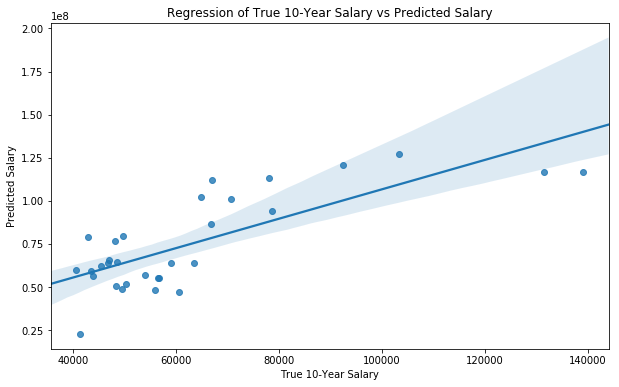

In [46]:
plt.figure(figsize=[10,6])
sns.regplot(x=y_test, y=predictions)
plt.title('Regression of True 10-Year Salary vs Predicted Salary')
plt.xlabel('True 10-Year Salary')
plt.ylabel('Predicted Salary')

In [47]:
df['MN_EARN_WNE_P10_log'] = np.log(df['MN_EARN_WNE_P10'])

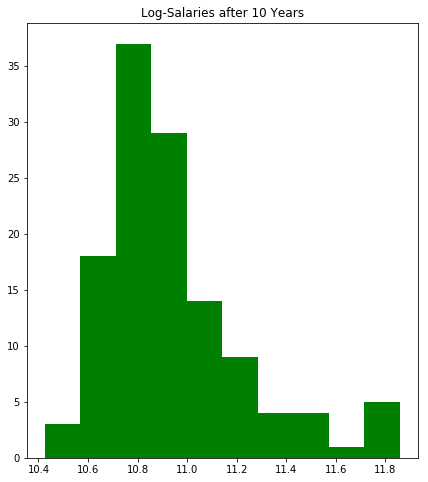

In [48]:
plt.figure(figsize=(7,8))
plt.hist(df['MN_EARN_WNE_P10_log'], color='green')
plt.title('Log-Salaries after 10 Years');

In [49]:
X = df[['acceptance-rate','act-avg','enrollment','hs-gpa-avg',
        'overallRank','sat-avg','tuition','PCT_WHITE',
        'PCT_ASIAN','PCT_BLACK','PCT_HISPANIC','PCT_BA','PCT_GRAD_PROF','PCT_BORN_US',
        'MEDIAN_HH_INC','POVERTY_RATE','UNEMP_RATE','LN_MEDIAN_HH_INC']]
y2 = df['MN_EARN_WNE_P10_log']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, random_state=42)

In [50]:
ss = StandardScaler()

X_train2_sc = ss.fit_transform(X_train2)
X_test2_sc = ss.transform(X_test2)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [51]:
lr_log = LinearRegression()

lr_log.fit(X_train2_sc, y_train2)
lr_log.score(X_train2_sc, y_train2), lr_log.score(X_test2_sc, y_test2)

(0.8909066246042493, 0.8321574913746684)

In [52]:
lr_log.coef_

array([ 0.02127887,  0.03638049, -0.01386854, -0.03515766, -0.02254301,
        0.18059147,  0.03993019,  0.00691997,  0.08971518,  0.03330563,
        0.06924766, -0.05243455,  0.01706852,  0.01480251,  0.45006303,
       -0.19089935,  0.02449293, -0.57625456])

In [53]:
lcv_log = LassoCV(cv=5)

lcv_log.fit(X_train2,y_train2)
lcv_log.score(X_train2,y_train2), lcv_log.score(X_test2, y_test2)

(0.8206132119237346, 0.8329838579853057)

In [54]:
rcv_log = RidgeCV(cv=5)

rcv_log.fit(X_train2,y_train2)
rcv_log.score(X_train2,y_train2), rcv_log.score(X_test2, y_test2)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.8758735880336569, 0.8736897986622507)

In [55]:
rcv_log_sc = RidgeCV(cv=5)

rcv_log_sc.fit(X_train2_sc, y_train2)
rcv_log_sc.score(X_train2_sc, y_train2), rcv_log_sc.score(X_test2_sc, y_test2)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.8686215422738418, 0.8633198664510751)

In [56]:
rcv_log.coef_

array([ 5.24594057e-04, -5.18119701e-04, -1.83225121e-06, -2.34488794e-02,
       -7.36995193e-04,  1.13058084e-03,  1.21761871e-06,  5.92686347e-03,
        2.66719516e-02,  4.72729556e-03,  5.87770507e-03, -6.54196030e-03,
        9.38434774e-03,  3.64841599e-03, -2.09145530e-06, -5.13366040e-03,
       -2.04891546e-03, -1.78163889e-03])

In [57]:
coefficients = pd.DataFrame(X.columns)
coefficients['values'] = pd.DataFrame(np.exp(rcv_log.coef_).T)

In [58]:
coefficients

,0,values
0,acceptance-rate,1.000525
1,act-avg,0.999482
2,enrollment,0.999998
3,hs-gpa-avg,0.976824
4,overallRank,0.999263
5,sat-avg,1.001131
6,tuition,1.000001
7,PCT_WHITE,1.005944
8,PCT_ASIAN,1.027031
9,PCT_BLACK,1.004738


In [59]:
coefficients[np.abs(coefficients['values']) > 1.005].sort_values(by='values')

,0,values
10,PCT_HISPANIC,1.005895
7,PCT_WHITE,1.005944
12,PCT_GRAD_PROF,1.009429
8,PCT_ASIAN,1.027031


In [60]:
predictions_log = rcv_log.predict(X_test2)

Text(0, 0.5, 'Predicted Salary')

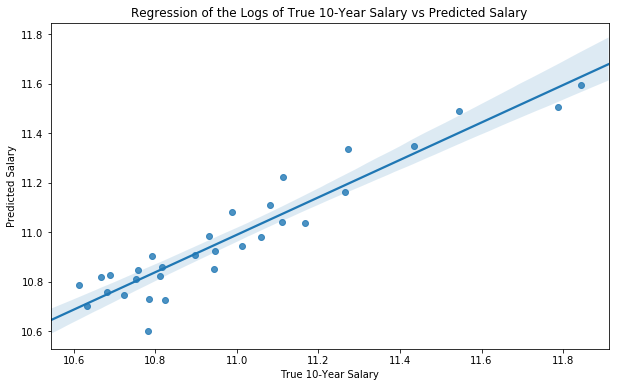

In [61]:
plt.figure(figsize=[10,6])
sns.regplot(x=y_test2, y=predictions_log)
plt.title('Regression of the Logs of True 10-Year Salary vs Predicted Salary')
plt.xlabel('True 10-Year Salary')
plt.ylabel('Predicted Salary')

Text(0, 0.5, 'Predicted Salary')

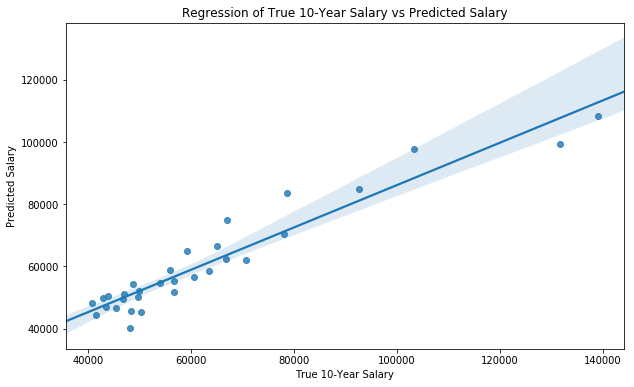

In [62]:
plt.figure(figsize=[10,6])
sns.regplot(x=y_test, y=np.exp(predictions_log))
plt.title('Regression of True 10-Year Salary vs Predicted Salary')
plt.xlabel('True 10-Year Salary')
plt.ylabel('Predicted Salary')

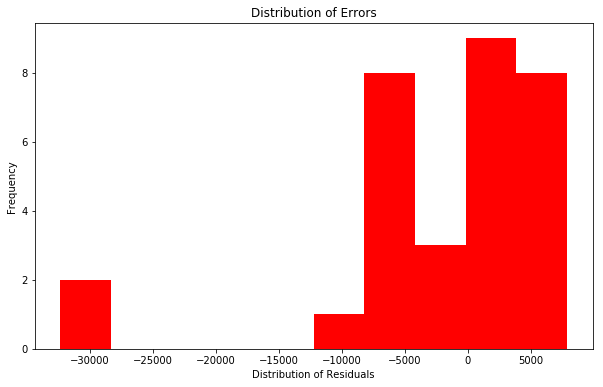

In [63]:
plt.figure(figsize=[10,6])
plt.hist((np.exp(predictions_log) - y_test), color='red')
plt.title('Distribution of Errors')
plt.xlabel('Distribution of Residuals')
plt.ylabel('Frequency');

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
mean_squared_error(y_true=y_test, y_pred=predictions)

6299187397140632.0

In [66]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))

79367420.2500033

In [67]:
mean_squared_error(y_true=y_test, y_pred=np.exp(predictions_log))

89348590.67813653

In [68]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(predictions_log)))

9452.438345640585

In [69]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

74794490.78912541

In [70]:
mean_absolute_error(y_true=y_test, y_pred=np.exp(predictions_log))

6325.032760909292